# Flare 2015/06/24
# CaIR

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


In [2]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un


In [3]:
def timeframe_to_filename_fits(frame):
    if frame <0 or frame > 511:
        raise IndexError(f'frame number {frame} is not in (0, 511).')
    else:
        return f"fits\CaIR\crisp_l2_20150624_134006_8542_r00{frame+300}.fits"
ttff = timeframe_to_filename_fits

<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_10336\864631161.py:5: SyntaxWarning: invalid escape sequence '\C'
  return f"fits\CaIR\crisp_l2_20150624_134006_8542_r00{frame+300}.fits"


In [4]:
with f.open(timeframe_to_filename_fits(500)) as io :
    wvl = io[1].data
    print(wvl)
    
np.save('line_data/wav_sstCaIR.npy', wvl)

[8543.23999995 8543.33999998 8543.44       8543.53999996 8543.63999999
 8543.73999995 8543.83999998 8543.94       8544.03999999 8544.13999999
 8544.24       8544.34       8544.44       8544.54       8544.64
 8544.74000001 8544.84000001 8544.94       8545.04000002 8545.14000005
 8545.24000001 8545.34000004 8545.44       8545.54000002 8545.64000005]


In [5]:
time_list = []
for i in range(512):
    time_list.append(f.getheader(ttff(i))["DATE-AVG"][11:23])
# time_list

fits\CaIR\crisp_l2_20150624_134006_8542_r00300.fits
s=(25, 1550, 1498)
the shape of the data is (512, 1, 25, 1550, 1498)
the wavelengths are self._wavel = array([8543.23999995, 8543.33999998, 8543.44      , 8543.53999996,
       8543.63999999, 8543.73999995, 8543.83999998, 8543.94      ,
       8544.03999999, 8544.13999999, 8544.24      , 8544.34      ,
       8544.44      , 8544.54      , 8544.64      , 8544.74000001,
       8544.84000001, 8544.94      , 8545.04000002, 8545.14000005,
       8545.24000001, 8545.34000004, 8545.44      , 8545.54000002,
       8545.64000005], dtype='>f8')
(1550, 1498) (1550, 1498)
Boundary
Blue=Outside, yellow=Inside


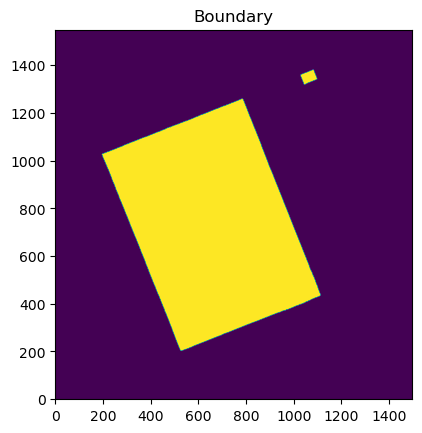

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


In [6]:
reload(un)
CaIR = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstCaIR.npy', number_of_frames=512,
                 time=time_list, name_of_line='CaIR15', thresh=[0, 100000],  boundary_methode='search', boundary_arguments = {"error":0.001})

# CaIR.datacube
# np.shape(CaIR.datacube), CaIR.datacube(0)[0:30:5,10:20:5, 100:200:30]


In [7]:
CaIR.calculate__FOV_spect_over_time()

In [8]:
secs = un.get_TIME(CaIR)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")
print(f'{CaIR.shape=}')

Not official start flare defined for CaIR15 falling back to first of TIME[0], the execpt_time 14:48:29.717.
the mean cadence is 13.696673189823871 for this line!
CaIR.shape=(512, 1, 25, 1550, 1498)


[[2.0, 1.875], [7.0, 1.875], [12.0, 1.875]]
The guessed filters are [[3.666666666666667, 3.125], [12.0, 3.125], [20.333333333333332, 3.125]]


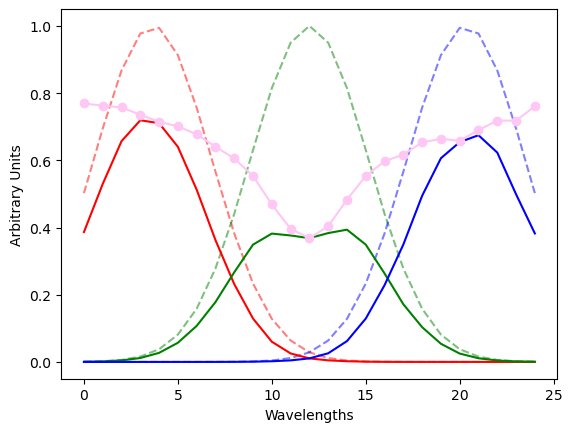

In [9]:
# %matplotlib inline
gf = un.guess_filters(15)
print(gf)
CaIR.update_filters(None)# [[3,2], [7,2], [11,2]]
CaIR.plot_filt(880,900)
plt.show()

In [10]:
# # %matplotlib widget
# for frame in range(0,CaIR._number_of_frames, 100):
#     # frame=0
#     CaIR.ccp_frame(frame,Show=False)
#     plt.imshow(CaIR.current_ccp, origin='lower')
#     plt.imshow(CaIR.calculate_boundary(frame=frame), alpha=0.2)

#     # plt.imshow(CaIR.boundary, origin='lower', alpha=0.2)
#     plt.show()
#     print(np.shape(CaIR.current_ccp))#,np.shape(CaIR.boundary))

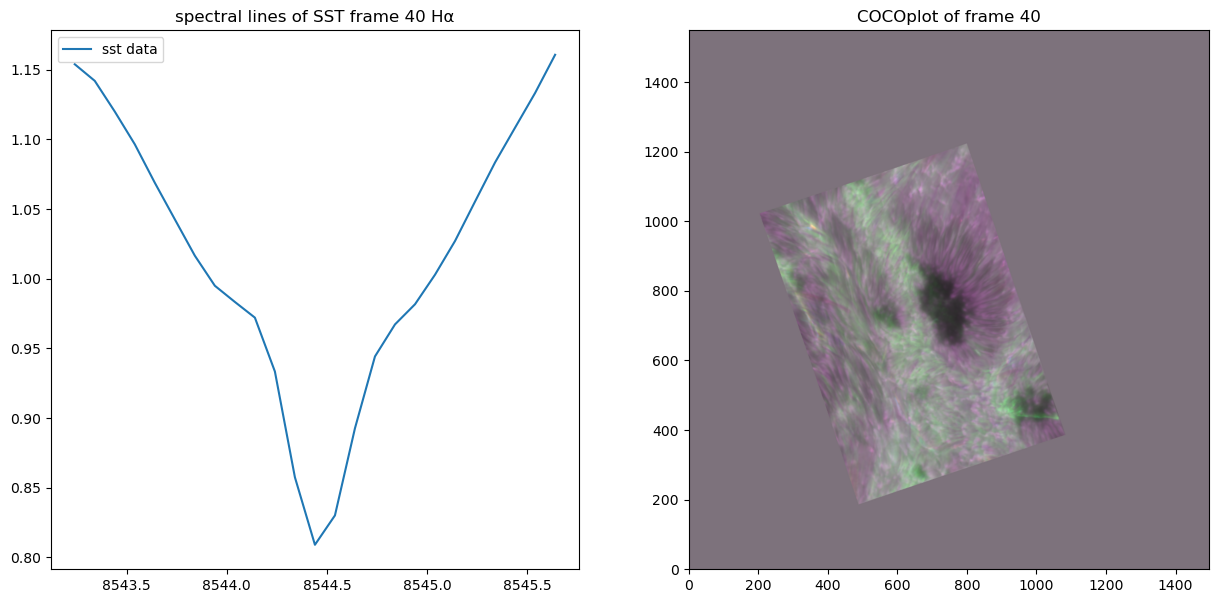

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
CaIR.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
CaIR.frame_integrated_spect(frame)
ax[0].plot(CaIR._wavel, CaIR.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(CaIR.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

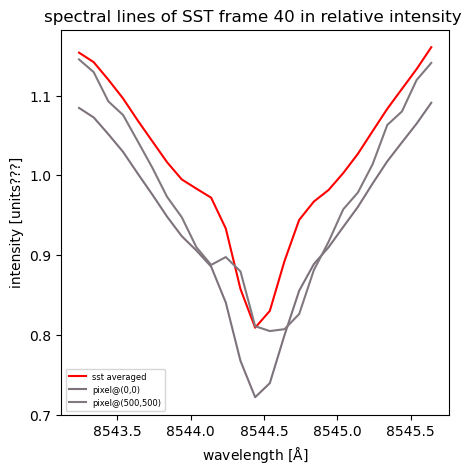

In [12]:
CaIR.current_ccp[0:30:10,0:60:20,:]
CaIR.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

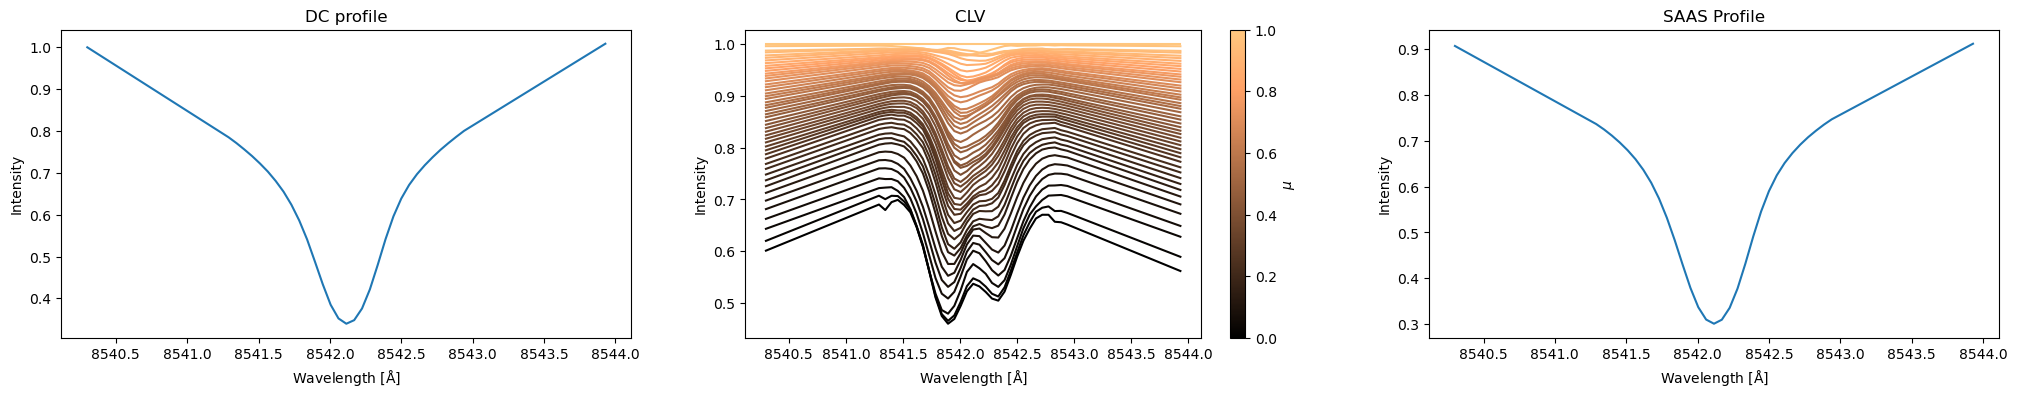

8542.114877954633 8542.114877954633


In [13]:

theor_CaIR = un.linestudier('E:/solar flares/data/2017-09-06/fits/8542_clv.fits', atlas=None, nr=101)
print(np.median(theor_CaIR.sst_wav), np.mean(theor_CaIR.sst_wav))

## Calculating the $\mu$ !!!!! 


In [14]:
CaIR.shape

(512, 1, 25, 1550, 1498)

In [15]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(CaIR.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        # print(add_enters(str(hdu.header), length_row=79))
        try: 
            print("x =", hdu.header['CRVAL1'], "y=", hdu.header['CRVAL2'])
        except KeyError:
            pass

# there is no coordinate information present! We take the mu from Beam electrons as a source of H&alpha; flare ribbons

x = 492.772 y= 174.558


[462.772, 522.7719999999999, 144.558, 204.558]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8411666578752544 for timeframe 0


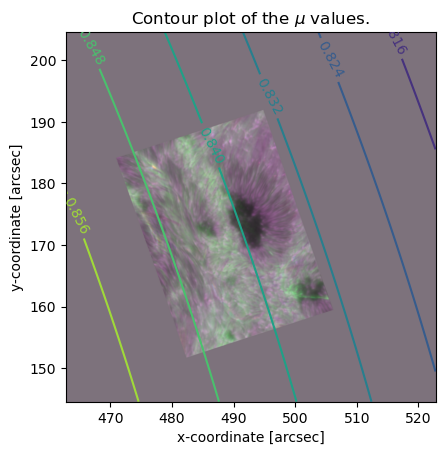

In [16]:
def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 60

position = (492.772, 174.558)

fxp = [position[0] - width / 2, position[0] + width / 2 ]
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fxp.extend(fyp)
print(fxp)

x = np.linspace(fxp[0], fxp[1], CaIR.shape[4])
y = np.linspace(fyp[0], fyp[1], CaIR.shape[3])

X, Y = np.meshgrid(x, y)

MU = calculate_mu(X,Y)


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)


def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.xx, over.yy = X, Y
        over.ccp_frame(frame, Show=False)
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        av_mu = np.average(MU, weights=over.boundary)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

    if over is not None:
        return av_mu
    
mu = give_mu_contourplot(MU, X, Y, fxp, over=CaIR)

sst_data = CaIR
theor_line = theor_CaIR
set_mu(CaIR, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaIR.index_mu], theor_line.sst_clv[theor_CaIR.index_mu][0], clv_fit(mu, theor_line)


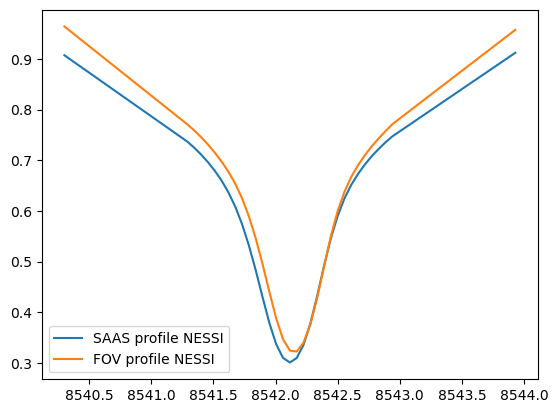

In [17]:
theor_CaIR.set_fov( sst_data.xx, sst_data.yy, CaIR.boundary, sr=959.63)

## Finding a suitable quiet sun patch

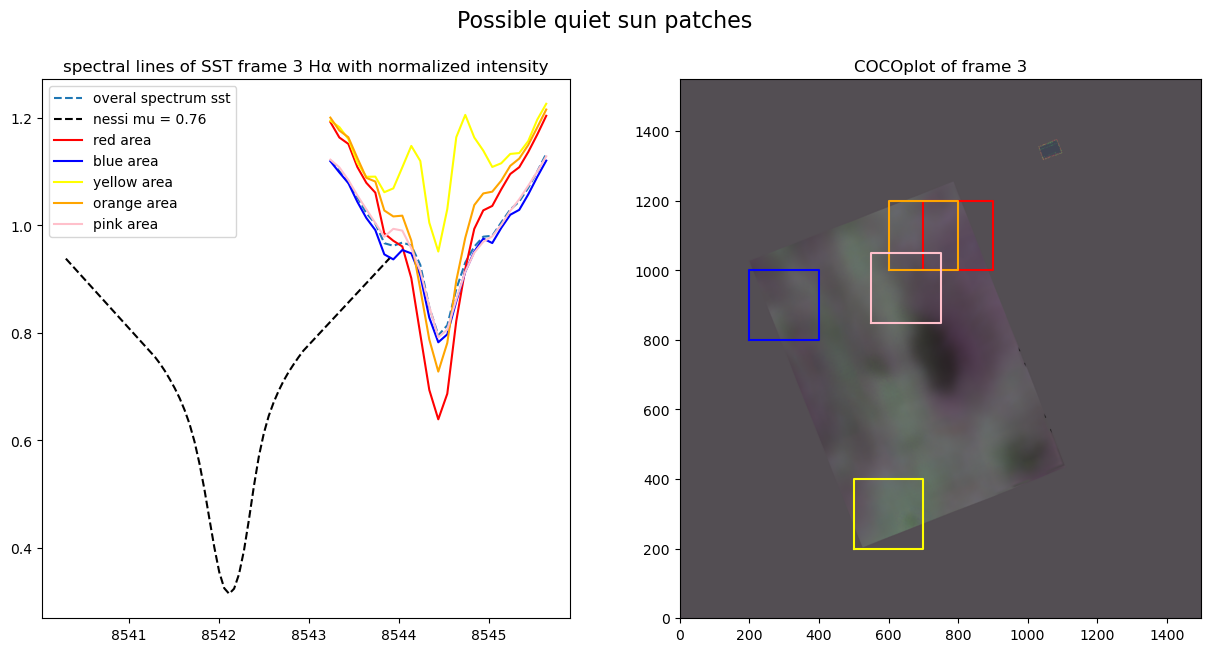

In [18]:
X = [[(700,900),(1000,1200)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(600,800),(1000,1200)], [(550,750),(850, 1050)]]
# %matplotlib widget
# %matplotlib inline
frame = 3

CaIR.possible_quiet_sun_patches(frame, theor_line , X=X)

### The Yellow patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [19]:
color_wanted_patch = 'blue'

the edges of the patch are denoted by the xlim: (200, 400) and ylim: (800, 1000)


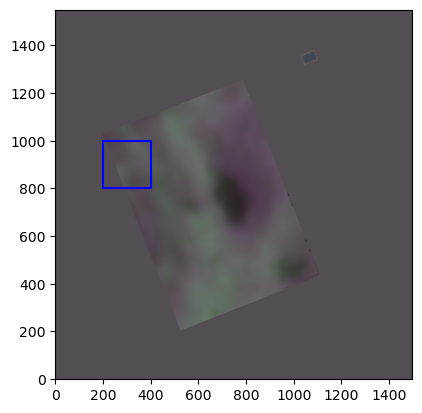

The quiet sun is pick at x (474.7760080160321, 179.3998334409296) with average              mu 0.8486897345458153
[[0.49059328 0.49063505 0.49067682 ... 0.49882124 0.498863   0.49890477]
 [0.49059328 0.49063505 0.49067682 ... 0.49882124 0.498863   0.49890477]
 [0.49059328 0.49063505 0.49067682 ... 0.49882124 0.498863   0.49890477]
 ...
 [0.49059328 0.49063505 0.49067682 ... 0.49882124 0.498863   0.49890477]
 [0.49059328 0.49063505 0.49067682 ... 0.49882124 0.498863   0.49890477]
 [0.49059328 0.49063505 0.49067682 ... 0.49882124 0.498863   0.49890477]] [[0.18293064 0.18293064 0.18293064 ... 0.18293064 0.18293064 0.18293064]
 [0.18297101 0.18297101 0.18297101 ... 0.18297101 0.18297101 0.18297101]
 [0.18301137 0.18301137 0.18301137 ... 0.18301137 0.18301137 0.18301137]
 ...
 [0.19088239 0.19088239 0.19088239 ... 0.19088239 0.19088239 0.19088239]
 [0.19092275 0.19092275 0.19092275 ... 0.19092275 0.19092275 0.19092275]
 [0.19096311 0.19096311 0.19096311 ... 0.19096311 0.19096311 0.19096311]

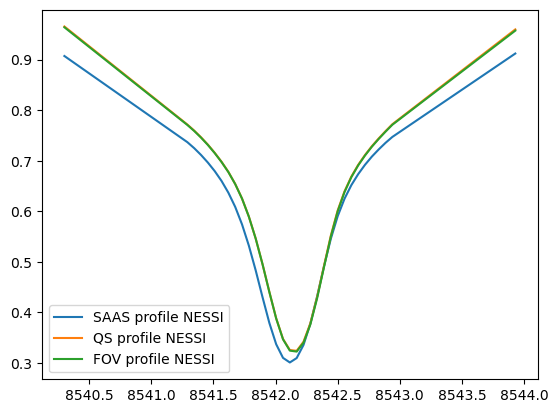

{'frame': 3, 'xlim': (200, 400), 'ylim': (800, 1000), 'color': 'blue'}

In [20]:
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaIR.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)

theor_line.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaIR.quiet_sun

[8543.23999995 8543.33999998 8543.44       8543.53999996 8543.63999999
 8543.73999995 8543.83999998 8543.94       8544.03999999 8544.13999999
 8544.24       8544.34       8544.44       8544.54       8544.64
 8544.74000001 8544.84000001 8544.94       8545.04000002 8545.14000005
 8545.24000001 8545.34000004 8545.44       8545.54000002 8545.64000005] [1.11924411 1.09830789 1.0785168  1.04376561 1.0136166  0.99107851
 0.94593755 0.93663943 0.95407688 0.9478374  0.90667455 0.82834456
 0.78255545 0.797297   0.85851862 0.91359202 0.95128224 0.97527817
 0.96701271 0.99515305 1.01959501 1.02873393 1.05746117 1.08994321
 1.12027734] [0.828995   0.84794819 0.86690138 0.88585456 0.90480775 0.92376093
 0.94271412 0.96166731 0.9806205  0.99957368 1.01852687 1.03748005
 1.05643324 1.07538643 1.09433961 1.1132928  1.13224598 1.15119917
 1.17015236 1.18910555 1.20805873 1.22701192 1.2459651  1.26491829
 1.28387148]
[2.32512205 1.59022941]
  message: Desired error not necessarily achieved due to precisi

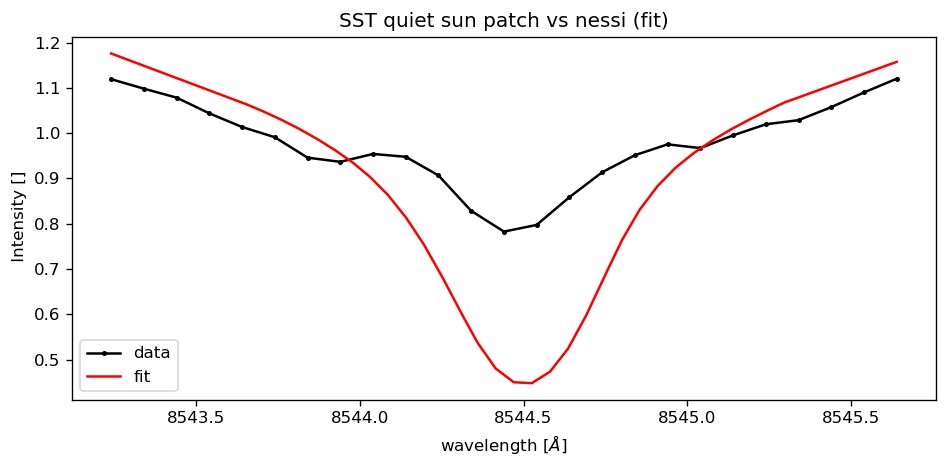

de p-waarde is  4.4469455170589524e-09 
Chi^2 reduced= 85.21869657021203 
aantal vrijheidgraden= 23 
chi^2= 1960.0300211148767
we behouden de fit tot op een betrouwbaarheidsniveau van  4.4469455170589524e-09 
Oftewel verwerp als p-waarde <lpha-niveau 


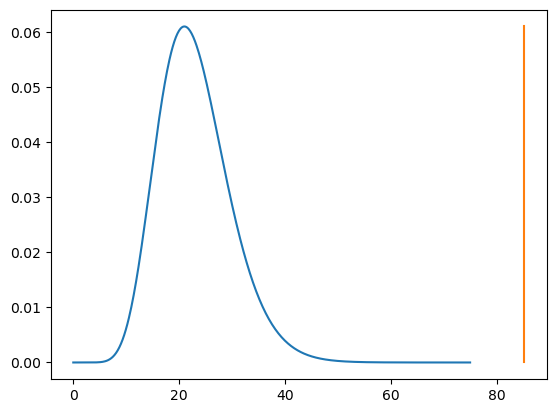

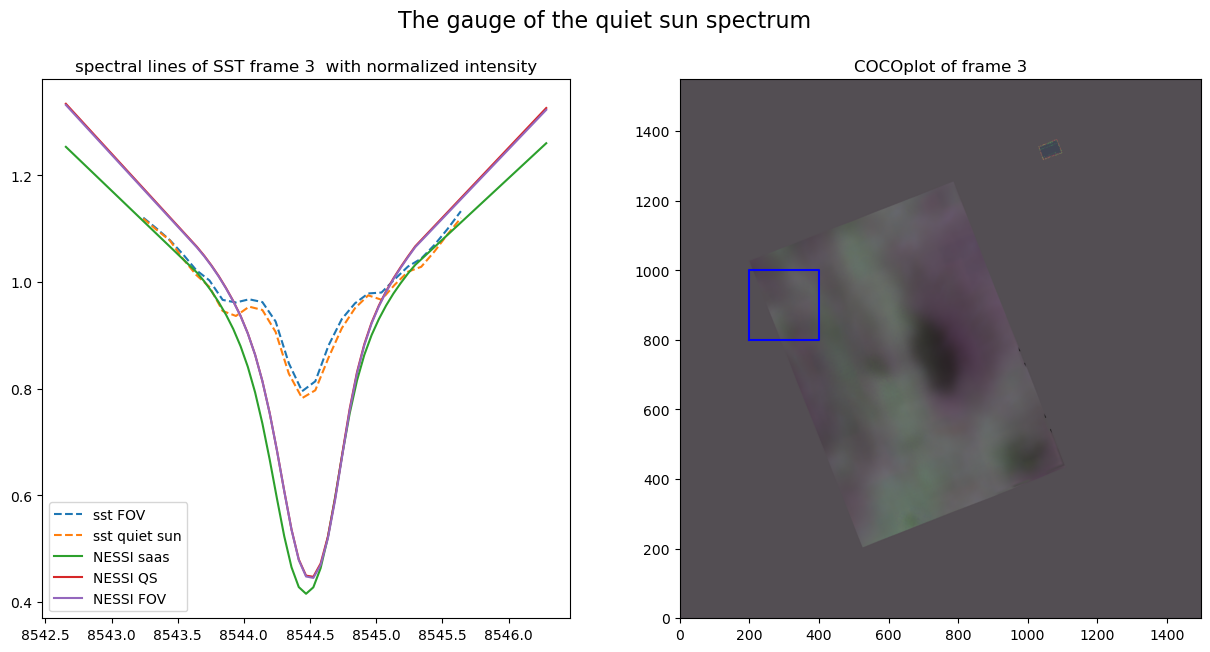

In [21]:
reload(un)
un.fit_qs_to_NESSI(theor_line, CaIR)

## The full FOV integrated spectrum over time:

In [22]:
CaIR.calculate__FOV_spect_over_time()

In [23]:
sst_data.quiet_sun

{'frame': 3, 'xlim': (200, 400), 'ylim': (800, 1000), 'color': 'blue'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [140] at time ['t=15:20:26 UT'].
The areafactor for THIS flare is 0.00030280575562193396 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 24.33%.


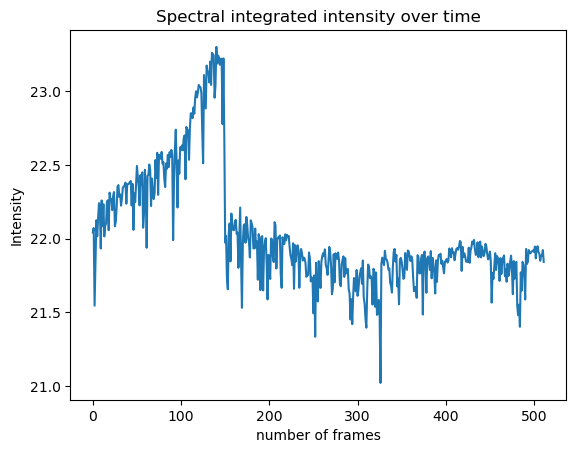

In [24]:
import use_nessi as un1
reload(un1)
un1.save_for_further_analysis(CaIR, theor_CaIR)


# Movie Making

In [25]:
# fill in here all arguments
theor_line = theor_line
sst_data = CaIR
name_of_flare = "C5.6"
name_of_line = "CaIR"

# un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)
# exit()

In [26]:
import os
filename = f'E:/solar flares/data/animations/{name_of_flare.replace(".", "")}_{name_of_line}_animation.mp4'
import matplotlib.animation as animation

if os.path.isfile(filename):
    print(f"The filename {filename} already exist")


The filename E:/solar flares/data/animations/C56_CaIR_animation.mp4 already exist


In [27]:

#params
frame = 0
fps = 6
nSeconds = 5
theta = sst_data.theta_nessi_to_quiet_sun
theta[1] = theta[2]

f_nessi_qs = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.spectr_qs 
                                , kind='linear', fill_value="extrapolate")
f_nessi_fov = lambda theta: interp1d(theor_line.sst_wav, theta[1] * theor_line.spectr_fov 
                                , kind='linear', fill_value="extrapolate")
f_nessi_saas = lambda theta: interp1d(theor_line.sst_wav, theta[1] * theor_line.saas_profile 
                                , kind='linear', fill_value="extrapolate")


wav = un.merge_wavelengths(sst_data._wavel - theta[0], theor_line.sst_wav)
if "CaK" in name_of_line:
    wav = wav[:-1]


def derive_intensity_lim(sst_data, mins = [], maxs = []):
    n = sst_data._number_of_frames   
    
    for frame in range(0, n, max(n//10, 1)):
        sst_data.frame_integrated_spect(frame)
        mins.append(np.min(sst_data.av_spect))
        maxs.append(np.max(sst_data.av_spect))
        
    return np.min(np.array(mins)), np.max(np.array(maxs))


limit = derive_intensity_lim(sst_data, 
                                mins=[np.min(f_nessi_saas(theta)(wav)), np.min(f_nessi_fov(theta)(wav))],
                                maxs=[np.max(f_nessi_saas(theta)(wav)), np.max(f_nessi_fov(theta)(wav))])

frame: 0, 14:48:29.717, total number of frames: 512 


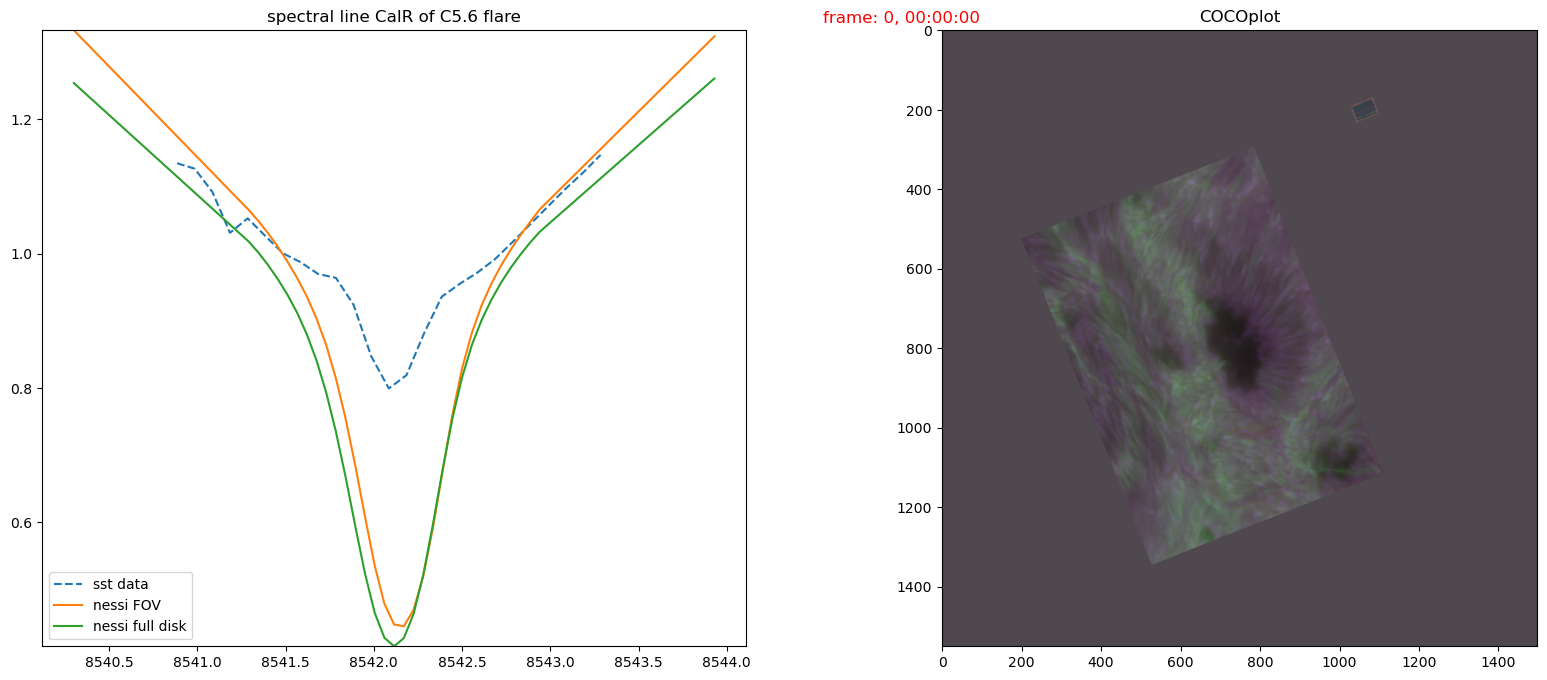

In [28]:


def frame_visualization(sst_data, frame, theta):
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20, 8), gridspec_kw={"width_ratios":[1,1]})

    sst_data.ccp_frame(frame,Show=False)
    a=sst_data.current_ccp

    ax[0].set_title(f"spectral line {name_of_line} of {name_of_flare} flare")
    sst_data.frame_integrated_spect(frame)
    if 'CaK' in name_of_line:
        line_sst, = ax[0].plot(sst_data._wavel[:-1]-theta[0], sst_data.av_spect[:-1], '--', label='sst data') 
    else:
        line_sst, = ax[0].plot(sst_data._wavel-theta[0], sst_data.av_spect, '--', label='sst data')
    ax[0].plot(wav , f_nessi_fov(theta)(wav), label='nessi FOV')
    ax[0].plot(wav, f_nessi_saas(theta)(wav), label='nessi full disk')
    ax[0].legend()

    ax[0].set_ylim(limit)

    im = ax[1].imshow(Image.fromarray(sst_data.current_ccp[::-1,:]))
    ax[1].set_title("COCOplot")
    text = ax[1].text(
        -300,
        -20,
        f"frame: {frame}, {un.time_hulp(sst_data.TIME[frame])}",
        fontsize=12,
        color='red',
    )
    print(
        f"frame: {frame}, {sst_data._time[frame]}, total number of frames: {sst_data._number_of_frames} "
    )

    plt.show()

    return fig, line_sst,  im, text

fig, line_sst, im, text, = frame_visualization(sst_data, frame, sst_data.theta_nessi_to_quiet_sun)

In [29]:
step = 1


# animation function.  This is called sequentially
def animate(i):
    # step of number of frames. How to step through the frames, at which rate.
    frame = step * i

    x = sst_data._wavel-theta[0]
    y = sst_data.frame_integrated_spect(frame)
    # f_sst2 = interp1d(sst_data._wavel-theta[0], y, kind='linear', fill_value="extrapolate")
    line_sst.set_data(x, y)

    print(frame, end=" ")


    text.set_text(f"frame: {str(frame)}, {str(sst_data._time[frame])[:8]}")
    # text = ax[1].text(
    #     -300, -20, f"frame: {str(frame)}, {str(sst_data._time[frame])[2:10]}", fontsize=12, color='red'
    # )    
    sst_data.ccp_frame(frame,Show=False)
    a = sst_data.current_ccp
    im.set_array(Image.fromarray(a[::-1,:]))
    return line_sst, [im], text

In [30]:



# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                            frames=(sst_data._number_of_frames-1) // step, interval=500) 

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save(filename, fps=fps, extra_args=['-vcodec', 'libx264'])



print("We are exiting this kernel")

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 

E:\solar flares/data/2017-09-06\use_nessi3.py:309: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:448: SyntaxWarning: invalid escape sequence '\A'
  labelx="wavelength $[\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:1210: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="fitting Nessi to sst data ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:1900: SyntaxWarning: invalid escape sequence '\D'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
E:\solar flares/data/2017-09-06\use_nessi3.py:1900: SyntaxWarning: invalid escape sequence '\A'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={

KeyboardInterrupt: 

In [ ]:
import use_nessi as un1
reload(un1)
un1.Difference_Movie_gray(theor_line, sst_data, name_of_flare, name_of_line, wavelength=6, 
                         step=1, show_boundary=False, frame_offset=5, time_offset=60, only_frame=None)

: 